## Import dataset from Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chilaact","key":"a6f73e21fcab2f56c68e9754c5413f8c"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [01:02<00:00, 40.0MB/s]
100% 2.70G/2.70G [01:02<00:00, 46.3MB/s]


In [ ]:
import os
import zipfile

local_zip = '/content/new-plant-diseases-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Import libraries

In [ ]:
from os import listdir
import matplotlib.pyplot as plt
from numpy import expand_dims, argmax, ravel

from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import Input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

## Transfer learning

In [ ]:
# download model
pretrained_model = MobileNetV2(include_top=False)

# number of labels/classes
CLASSES = 38

# add / replace a new layer in the output layer
x = pretrained_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)

# make the last layer use the activation function
# softmax so that it can be multi-class classification
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=(pretrained_model.input), outputs=predictions)

model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
_______________________________

## Compile model

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=optimizers.RMSprop(lr=base_learning_rate),
              loss=losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Pre-processing data

In [ ]:
batch_size =32
base_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

# preprocess parameters
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

# preprocess all images in each folder
train_generator = train_datagen.flow_from_directory(base_dir+'/train',
                                                    target_size=(256, 256),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(base_dir+'/valid',
                                                         target_size=(256, 256),
                                                         batch_size=batch_size,
                                                         class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


Get the class name from the folder name

In [ ]:
li = list(train_generator.class_indices.keys())

for i in li:
    print(i)

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___healthy


## Training model

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=train_generator.samples//batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples//batch_size)
# save model
model.save('mobilenetv2.h5')

Epoch 1/10
2196/2196 [==============================] - 1319s 601ms/step - loss: 2.8491 - accuracy: 0.8481 - val_loss: 3.1350 - val_accuracy: 0.5560
Epoch 2/10
2196/2196 [==============================] - 1319s 601ms/step - loss: 2.7090 - accuracy: 0.9768 - val_loss: 2.9926 - val_accuracy: 0.7013
Epoch 3/10
2196/2196 [==============================] - 1294s 589ms/step - loss: 2.7010 - accuracy: 0.9835 - val_loss: 3.0278 - val_accuracy: 0.6603
Epoch 4/10
2196/2196 [==============================] - 1295s 590ms/step - loss: 2.6960 - accuracy: 0.9874 - val_loss: 3.0458 - val_accuracy: 0.6452
Epoch 5/10
2196/2196 [==============================] - 1303s 593ms/step - loss: 2.6938 - accuracy: 0.9895 - val_loss: 2.9002 - val_accuracy: 0.7863
Epoch 6/10
2196/2196 [==============================] - 1283s 584ms/step - loss: 2.6920 - accuracy: 0.9910 - val_loss: 2.9196 - val_accuracy: 0.7677
Epoch 7/10
2196/2196 [==============================] - 1260s 574ms/step - loss: 2.6910 - accuracy: 0.9918

## Graphic loss and accuracy during training

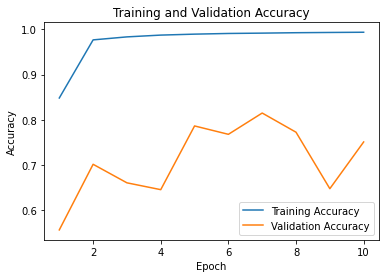

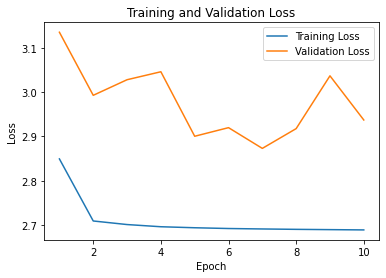

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# accuracy
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

# loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Load and testing model

In [ ]:
load_model = load_model('mobilenetv2.h5')

Used to test performance

In [ ]:
test_data_plant = listdir('/content/test/test')
pre_processing_img = lambda x : [expand_dims(image.img_to_array(image.load_img('/content/test/test/'+i,
                               target_size=(256, 256))), axis=0)/255 for i in x]

test_data = pre_processing_img(test_data_plant)

In [ ]:
test_data_plant

['AppleScab2.JPG',
 'PotatoHealthy1.JPG',
 'TomatoYellowCurlVirus6.JPG',
 'AppleScab1.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'CornCommonRust3.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight4.JPG',
 'PotatoEarlyBlight3.JPG',
 'TomatoHealthy4.JPG',
 'PotatoHealthy2.JPG',
 'CornCommonRust2.JPG',
 'TomatoHealthy2.JPG',
 'PotatoEarlyBlight5.JPG',
 'AppleScab3.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoEarlyBlight3.JPG',
 'CornCommonRust1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight4.JPG',
 'AppleCedarRust2.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'AppleCedarRust3.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy3.JPG',
 'AppleCedarRust4.JPG',
 'AppleCedarRust1.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'PotatoEarlyBlight1.JPG']

In [ ]:
result_prediction = [argmax(load_model.predict(i)) for i in test_data]
ravel(result_prediction)

array([ 2, 22, 35,  3, 35,  8, 34, 30, 20, 37, 22,  8, 37, 20, 25, 37, 37,
        8, 20, 20,  2, 35,  2, 35, 32, 10, 30, 37, 37,  2,  2, 37, 20])

In [ ]:
for i in range(len(result_prediction)):
    print("Result Prediction :", li[result_prediction[i]],
          "\nActual Value", test_data_plant[i], '\n')

Result Prediction : Apple___Cedar_apple_rust 
Actual Value AppleScab2.JPG 

Result Prediction : Potato___healthy 
Actual Value PotatoHealthy1.JPG 

Result Prediction : Tomato___Tomato_Yellow_Leaf_Curl_Virus 
Actual Value TomatoYellowCurlVirus6.JPG 

Result Prediction : Apple___healthy 
Actual Value AppleScab1.JPG 

Result Prediction : Tomato___Tomato_Yellow_Leaf_Curl_Virus 
Actual Value TomatoYellowCurlVirus5.JPG 

Result Prediction : Corn_(maize)___Common_rust_ 
Actual Value CornCommonRust3.JPG 

Result Prediction : Tomato___Target_Spot 
Actual Value TomatoEarlyBlight5.JPG 

Result Prediction : Tomato___Late_blight 
Actual Value TomatoEarlyBlight4.JPG 

Result Prediction : Potato___Early_blight 
Actual Value PotatoEarlyBlight3.JPG 

Result Prediction : Tomato___healthy 
Actual Value TomatoHealthy4.JPG 

Result Prediction : Potato___healthy 
Actual Value PotatoHealthy2.JPG 

Result Prediction : Corn_(maize)___Common_rust_ 
Actual Value CornCommonRust2.JPG 

Result Prediction : Tomato__